In [1]:
import keras as ks, tensorflow as tf, numpy as np
import matplotlib.pyplot as plt

In [157]:
@tf.function
def DynamicRate(loss):
    return tf.experimental.numpy.log10(loss) / 10.0 #*unsure about this at the end

class DRMSprop(ks.optimizers.RMSprop):
    def __init__(self, learning_rate=0.001, rho=0.9, momentum=0, epsilon=1e-7, centered=False, weight_decay=None, clipnorm=None, clipvalue=None, global_clipnorm=None, use_ema=False, ema_momentum=0.99, ema_overwrite_frequency=None, loss_scale_factor=None, gradient_accumulation_steps=None, name="rmsprop", **kwargs):
        super().__init__(learning_rate, rho, momentum, epsilon, centered, weight_decay, clipnorm, clipvalue, global_clipnorm, use_ema, ema_momentum, ema_overwrite_frequency, loss_scale_factor, gradient_accumulation_steps, name, **kwargs)
    def scale_loss(self, loss):
        self.learning_rate = DynamicRate(loss)
        #*against, only to track rate
        LR_Track.append(self.learning_rate.numpy())
        return super().scale_loss(loss)

In [161]:
LR_Track = []
DRMSprop_ = DRMSprop(0.1)
RMSprop_ = ks.optimizers.RMSprop(0.1)
Adam_ = ks.optimizers.Adam(0.1)
(x_train, y_train), (x_test, y_test) = ks.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [162]:
inputs = ks.Input(shape=(784,))
dense = ks.layers.Dense(64, activation="relu")
x = dense(inputs)
x = ks.layers.Dense(64, activation="relu")(x)
outputs = ks.layers.Dense(10)(x)
mdl = ks.Model(inputs=inputs, outputs=outputs, name="mnist_model")

mdl.compile(
    loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=DRMSprop_,
    metrics=[ks.metrics.SparseCategoricalAccuracy()],
    run_eagerly=True
)


In [133]:
history_Adam = mdl.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6117 - sparse_categorical_accuracy: 0.3688 - val_loss: 1.5760 - val_sparse_categorical_accuracy: 0.3765
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 1.5746 - sparse_categorical_accuracy: 0.3824 - val_loss: 1.6311 - val_sparse_categorical_accuracy: 0.3832
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - loss: 1.5648 - sparse_categorical_accuracy: 0.3810 - val_loss: 1.5524 - val_sparse_categorical_accuracy: 0.3762
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - loss: 1.5760 - sparse_categorical_accuracy: 0.3752 - val_loss: 1.5458 - val_sparse_categorical_accuracy: 0.3780
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5623 - sparse_categorical_accuracy: 0.3882 - val_loss: 1.5426 - val_sparse_categorical_accuracy: 0.3809
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5593 - sparse_categorical_accuracy: 0.3857 - val_loss: 1.6171 - val_sparse_categorical_accuracy: 0.371

In [135]:
history_RMSprop = mdl.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.5770 - sparse_categorical_accuracy: 0.1925 - val_loss: 1.7979 - val_sparse_categorical_accuracy: 0.2951
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - loss: 1.7902 - sparse_categorical_accuracy: 0.2941 - val_loss: 1.7655 - val_sparse_categorical_accuracy: 0.2960
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - loss: 1.7897 - sparse_categorical_accuracy: 0.2971 - val_loss: 1.5306 - val_sparse_categorical_accuracy: 0.3843
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6734 - sparse_categorical_accuracy: 0.3666 - val_loss: 1.7340 - val_sparse_categorical_accuracy: 0.3067
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7326 - sparse_categorical_accuracy: 0.3204 - val_loss: 1.7179 - val_sparse_categorical_accuracy: 0.3439
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - loss: 1.7219 - sparse_categorical_accuracy: 0.3355 - val_loss: 1.5772 - val_sparse_categorical_accuracy: 0.369

In [163]:
history_DRMSprop = mdl.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - loss: 7.6190 - sparse_categorical_accuracy: 0.3970 - val_loss: 1.0139 - val_sparse_categorical_accuracy: 0.6186
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - loss: 1.0423 - sparse_categorical_accuracy: 0.5989 - val_loss: 0.9622 - val_sparse_categorical_accuracy: 0.6428
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 1.0310 - sparse_categorical_accuracy: 0.6148 - val_loss: 1.0212 - val_sparse_categorical_accuracy: 0.6081
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 1.0226 - sparse_categorical_accuracy: 0.6326 - val_loss: 0.9693 - val_sparse_categorical_accuracy: 0.6566
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - loss: 1.0179 - sparse_categorical_accuracy: 0.6353 - val_loss: 0.9721 - val_sparse_categorical_accuracy: 0.6709
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 1.0172 - sparse_categorical_accuracy: 0.6462 - val_loss: 0.9685 - val_sparse_categorical_accuracy:

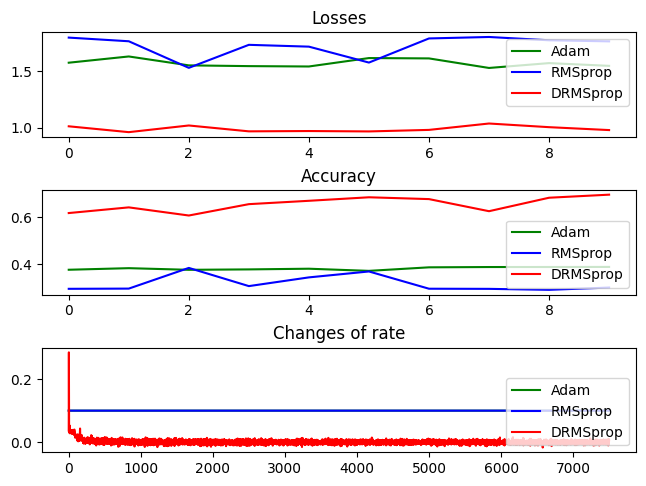

In [168]:
val_loss_Adam = history_Adam.history["val_loss"]
val_accuracy_Adam = history_Adam.history["val_sparse_categorical_accuracy"]

val_loss_RMSprop = history_RMSprop.history["val_loss"]
val_accuracy_RMSprop = history_RMSprop.history["val_sparse_categorical_accuracy"]

val_loss_DRMSprop = history_DRMSprop.history["val_loss"]
val_accuracy_DRMSprop = history_DRMSprop.history["val_sparse_categorical_accuracy"]

fig, axis = plt.subplots(3)
axis[0].plot(range(10), val_loss_Adam, color="green")
axis[0].plot(range(10), val_loss_RMSprop, color="blue")
axis[0].plot(range(10), val_loss_DRMSprop, color="red")
axis[0].legend(["Adam", "RMSprop", "DRMSprop"], loc="upper right")
axis[0].set_title("Losses")
axis[1].plot(range(10), val_accuracy_Adam, color="green")
axis[1].plot(range(10), val_accuracy_RMSprop, color="blue")
axis[1].plot(range(10), val_accuracy_DRMSprop, color="red")
axis[1].legend(["Adam", "RMSprop", "DRMSprop"], loc="lower right")
axis[1].set_title("Accuracy")
axis[2].plot(range(7500), [0.1]*7500, color="green")
axis[2].plot(range(7500), [0.1]*7500, color="blue")
axis[2].plot(range(7500), LR_Track, color="red")
axis[2].legend(["Adam", "RMSprop", "DRMSprop"], loc="lower right")
axis[2].set_title("Changes of rate")
fig.tight_layout(pad=0.5)
plt.show()